In [1]:
from datetime import datetime, timedelta
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like #For solving import pandas_datareader issue
import numpy as np
import datetime
import csv
import requests
import pandas_datareader.data as web
import pandas_datareader as pdr
from pandas_datareader import data, wb
import nsepy


In [2]:
#pip install nsepy

In [3]:
start = datetime.datetime(2020,3,20)
end = datetime.datetime(2020,4,20)

In [4]:
sbin = nsepy.get_history(symbol='SBIN',
                    start=datetime.datetime(2000,4,1), 
                    end=datetime.datetime(2020,7,12))

In [5]:
sbin

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-04-03,SBIN,EQ,204.75,205.00,219.65,205.00,211.50,213.30,214.44,3924088,8.414777e+13,NaN,NaN,NaN
2000-04-04,SBIN,EQ,213.30,210.55,211.50,196.25,196.25,196.35,200.50,2934025,5.882657e+13,NaN,NaN,NaN
2000-04-05,SBIN,EQ,196.35,197.00,203.00,187.50,196.50,196.20,194.80,2155066,4.197978e+13,NaN,NaN,NaN
2000-04-06,SBIN,EQ,196.20,198.00,206.40,194.30,203.75,203.90,201.20,3351461,6.743140e+13,NaN,NaN,NaN
2000-04-07,SBIN,EQ,203.90,204.00,219.50,204.00,216.25,218.10,213.65,7451592,1.592001e+14,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,SBIN,EQ,184.70,186.60,189.85,186.15,187.90,188.05,188.35,43789749,8.247963e+14,215925.0,9492655.0,0.2168
2020-07-07,SBIN,EQ,188.05,187.00,189.20,184.05,188.00,188.60,186.66,55124984,1.028941e+15,245296.0,7395581.0,0.1342
2020-07-08,SBIN,EQ,188.60,188.90,197.45,188.40,191.70,191.90,194.17,143083196,2.778285e+15,620914.0,33127615.0,0.2315


In [6]:
print("checking if any null values are present\n", sbin.isna().sum())

checking if any null values are present
 Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2789
Deliverable Volume     452
%Deliverble            452
dtype: int64


In [7]:
sbin.drop(['Trades', 'Deliverable Volume','%Deliverble'], axis = 1,inplace=True) 

In [8]:
sbin

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,,
2000-04-03,SBIN,EQ,204.75,205.00,219.65,205.00,211.50,213.30,214.44,3924088,8.414777e+13
2000-04-04,SBIN,EQ,213.30,210.55,211.50,196.25,196.25,196.35,200.50,2934025,5.882657e+13
2000-04-05,SBIN,EQ,196.35,197.00,203.00,187.50,196.50,196.20,194.80,2155066,4.197978e+13
2000-04-06,SBIN,EQ,196.20,198.00,206.40,194.30,203.75,203.90,201.20,3351461,6.743140e+13
2000-04-07,SBIN,EQ,203.90,204.00,219.50,204.00,216.25,218.10,213.65,7451592,1.592001e+14
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,SBIN,EQ,184.70,186.60,189.85,186.15,187.90,188.05,188.35,43789749,8.247963e+14
2020-07-07,SBIN,EQ,188.05,187.00,189.20,184.05,188.00,188.60,186.66,55124984,1.028941e+15
2020-07-08,SBIN,EQ,188.60,188.90,197.45,188.40,191.70,191.90,194.17,143083196,2.778285e+15


In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})


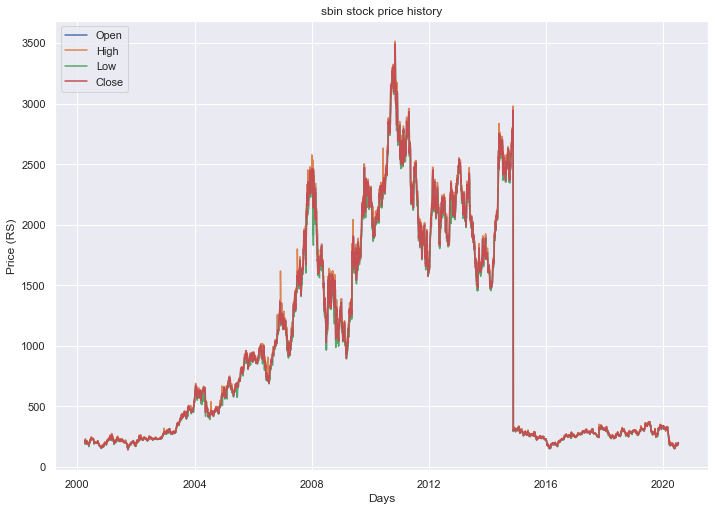

In [10]:

plt.figure()
plt.plot(sbin["Open"])
plt.plot(sbin["High"])
plt.plot(sbin["Low"])
plt.plot(sbin["Close"])
plt.title('sbin stock price history')
plt.ylabel('Price (RS)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

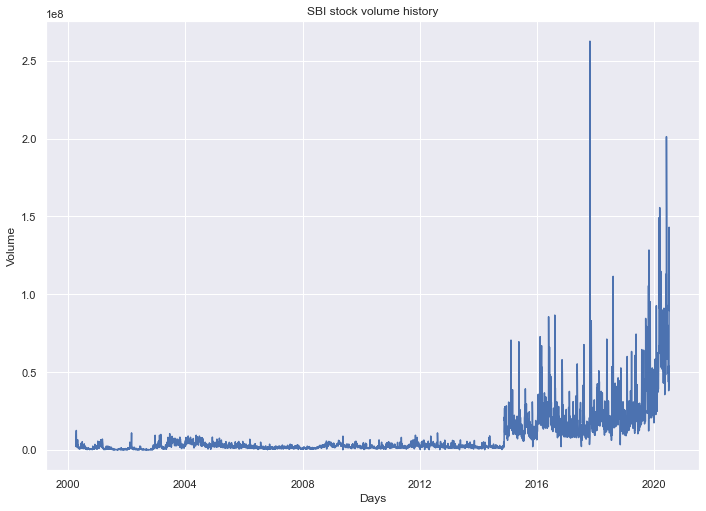

In [11]:
plt.figure()
plt.plot(sbin["Volume"])
plt.title('SBI stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [12]:
sbin

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,,
2000-04-03,SBIN,EQ,204.75,205.00,219.65,205.00,211.50,213.30,214.44,3924088,8.414777e+13
2000-04-04,SBIN,EQ,213.30,210.55,211.50,196.25,196.25,196.35,200.50,2934025,5.882657e+13
2000-04-05,SBIN,EQ,196.35,197.00,203.00,187.50,196.50,196.20,194.80,2155066,4.197978e+13
2000-04-06,SBIN,EQ,196.20,198.00,206.40,194.30,203.75,203.90,201.20,3351461,6.743140e+13
2000-04-07,SBIN,EQ,203.90,204.00,219.50,204.00,216.25,218.10,213.65,7451592,1.592001e+14
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,SBIN,EQ,184.70,186.60,189.85,186.15,187.90,188.05,188.35,43789749,8.247963e+14
2020-07-07,SBIN,EQ,188.05,187.00,189.20,184.05,188.00,188.60,186.66,55124984,1.028941e+15
2020-07-08,SBIN,EQ,188.60,188.90,197.45,188.40,191.70,191.90,194.17,143083196,2.778285e+15


In [13]:

#X_train = X[:4000]
#X_test = X[4000:]
#y_train = y[:4000]
#y_test=y[4000:]

In [14]:
sbin

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,,
2000-04-03,SBIN,EQ,204.75,205.00,219.65,205.00,211.50,213.30,214.44,3924088,8.414777e+13
2000-04-04,SBIN,EQ,213.30,210.55,211.50,196.25,196.25,196.35,200.50,2934025,5.882657e+13
2000-04-05,SBIN,EQ,196.35,197.00,203.00,187.50,196.50,196.20,194.80,2155066,4.197978e+13
2000-04-06,SBIN,EQ,196.20,198.00,206.40,194.30,203.75,203.90,201.20,3351461,6.743140e+13
2000-04-07,SBIN,EQ,203.90,204.00,219.50,204.00,216.25,218.10,213.65,7451592,1.592001e+14
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,SBIN,EQ,184.70,186.60,189.85,186.15,187.90,188.05,188.35,43789749,8.247963e+14
2020-07-07,SBIN,EQ,188.05,187.00,189.20,184.05,188.00,188.60,186.66,55124984,1.028941e+15
2020-07-08,SBIN,EQ,188.60,188.90,197.45,188.40,191.70,191.90,194.17,143083196,2.778285e+15


In [15]:
sbin.iloc[:,2:4]

,Prev Close,Open
Date,,
2000-04-03,204.75,205.00
2000-04-04,213.30,210.55
2000-04-05,196.35,197.00
2000-04-06,196.20,198.00
2000-04-07,203.90,204.00
...,...,...
2020-07-06,184.70,186.60
2020-07-07,188.05,187.00
2020-07-08,188.60,188.90


In [48]:
training_set = sbin.iloc[:4000, 2:3].values
test_set=sbin.iloc[4000:, 2:3].values

In [49]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
#training_set_scaled = sc.fit_transform(X)

In [50]:
#training_set_scaled

In [80]:
#60day window interval
X_train = []
y_train = []
for i in range(60, 4000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    #y_train.append(sbin.iloc[i, 2])
X_train, y_train = np.array(X_train), np.array(y_train)
df_x=pd.DataFrame(X_train)
print(X_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(3940, 60)
(3940, 60, 1)


In [81]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.018904,0.021457,0.016395,0.016351,0.018650,0.022891,0.023846,0.023682,0.022846,0.018934,...,0.023667,0.024399,0.027520,0.026848,0.028595,0.025041,0.026594,0.028416,0.025788,0.025564
1,0.021457,0.016395,0.016351,0.018650,0.022891,0.023846,0.023682,0.022846,0.018934,0.016679,...,0.024399,0.027520,0.026848,0.028595,0.025041,0.026594,0.028416,0.025788,0.025564,0.025997
2,0.016395,0.016351,0.018650,0.022891,0.023846,0.023682,0.022846,0.018934,0.016679,0.017784,...,0.027520,0.026848,0.028595,0.025041,0.026594,0.028416,0.025788,0.025564,0.025997,0.026460
3,0.016351,0.018650,0.022891,0.023846,0.023682,0.022846,0.018934,0.016679,0.017784,0.018307,...,0.026848,0.028595,0.025041,0.026594,0.028416,0.025788,0.025564,0.025997,0.026460,0.025668
4,0.018650,0.022891,0.023846,0.023682,0.022846,0.018934,0.016679,0.017784,0.018307,0.018516,...,0.028595,0.025041,0.026594,0.028416,0.025788,0.025564,0.025997,0.026460,0.025668,0.026639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935,0.020158,0.018770,0.017306,0.017754,0.016306,0.012797,0.011811,0.012394,0.009616,0.010199,...,0.016739,0.016470,0.013991,0.014350,0.016754,0.015768,0.016186,0.015903,0.012812,0.012662
3936,0.018770,0.017306,0.017754,0.016306,0.012797,0.011811,0.012394,0.009616,0.010199,0.012886,...,0.016470,0.013991,0.014350,0.016754,0.015768,0.016186,0.015903,0.012812,0.012662,0.012095
3937,0.017306,0.017754,0.016306,0.012797,0.011811,0.012394,0.009616,0.010199,0.012886,0.012394,...,0.013991,0.014350,0.016754,0.015768,0.016186,0.015903,0.012812,0.012662,0.012095,0.012438
3938,0.017754,0.016306,0.012797,0.011811,0.012394,0.009616,0.010199,0.012886,0.012394,0.012827,...,0.014350,0.016754,0.015768,0.016186,0.015903,0.012812,0.012662,0.012095,0.012438,0.013976


In [82]:
y_train

array([0.02599671, 0.02645961, 0.02566821, ..., 0.01397641, 0.01384202,
       0.01506645])

In [83]:
(X_train).shape

(3940, 60, 1)

In [84]:
(y_train).shape

(3940,)

In [85]:
X_train[3]

array([[0.0163506 ],
       [0.01865014],
       [0.02289085],
       [0.0238465 ],
       [0.02368225],
       [0.02284605],
       [0.01893385],
       [0.01667911],
       [0.01778408],
       [0.0183067 ],
       [0.01851575],
       [0.01784381],
       [0.01769449],
       [0.02199492],
       [0.01948634],
       [0.01941168],
       [0.01621622],
       [0.01647006],
       [0.01841123],
       [0.01790354],
       [0.01700762],
       [0.01663431],
       [0.01678363],
       [0.01434971],
       [0.01363297],
       [0.01408093],
       [0.01397641],
       [0.01454383],
       [0.01279677],
       [0.01309542],
       [0.01234881],
       [0.01163207],
       [0.0116918 ],
       [0.01279677],
       [0.01384202],
       [0.01524563],
       [0.01706734],
       [0.01862028],
       [0.01727639],
       [0.01809766],
       [0.01921756],
       [0.02017321],
       [0.02012842],
       [0.02351799],
       [0.02435419],
       [0.02292071],
       [0.02278632],
       [0.023

In [86]:
y_train

array([0.02599671, 0.02645961, 0.02566821, ..., 0.01397641, 0.01384202,
       0.01506645])

In [87]:
X_train.shape

(3940, 60, 1)

In [78]:
#pip install seq2seq-lstm

In [79]:
### Y_train has to be scaled version
### doesn't work on raw values of y_train
### check the loss here
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


regressor = Sequential()
print(X_train.shape)
print(X_train.shape[1])
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(X_train.shape[1])
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

(3940, 60, 1)
60
60
Epoch 1/10
124/124 [==============================] - 8s 62ms/step - loss: 2198977.0000
Epoch 2/10
124/124 [==============================] - 7s 60ms/step - loss: 2178379.7500
Epoch 3/10
124/124 [==============================] - 8s 60ms/step - loss: 2162980.7500
Epoch 4/10
124/124 [==============================] - 7s 60ms/step - loss: 2147912.7500
Epoch 5/10
124/124 [==============================] - 8s 65ms/step - loss: 2132936.2500
Epoch 6/10
124/124 [==============================] - 8s 64ms/step - loss: 2118186.2500
Epoch 7/10
124/124 [==============================] - 7s 60ms/step - loss: 2104056.0000
Epoch 8/10
124/124 [==============================] - 8s 64ms/step - loss: 2089784.5000
Epoch 9/10
124/124 [==============================] - 8s 62ms/step - loss: 2075222.1250
Epoch 10/10
124/124 [==============================] - 8s 63ms/step - loss: 2060813.3750


In [89]:
### Y_train has to be scaled version
### doesn't work on raw values of y_train
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


regressor = Sequential()
print(X_train.shape)
print(X_train.shape[1])
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(X_train.shape[1])
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

(3940, 60, 1)
60
60
Epoch 1/10
124/124 [==============================] - 8s 64ms/step - loss: 0.0105
Epoch 2/10
124/124 [==============================] - 7s 59ms/step - loss: 0.0043
Epoch 3/10
124/124 [==============================] - 7s 58ms/step - loss: 0.0036
Epoch 4/10
124/124 [==============================] - 7s 58ms/step - loss: 0.0032
Epoch 5/10
124/124 [==============================] - 7s 58ms/step - loss: 0.0029
Epoch 6/10
124/124 [==============================] - 7s 59ms/step - loss: 0.0026
Epoch 7/10
124/124 [==============================] - 7s 58ms/step - loss: 0.0026
Epoch 8/10
124/124 [==============================] - 7s 58ms/step - loss: 0.0024
Epoch 9/10
124/124 [==============================] - 7s 58ms/step - loss: 0.0024
Epoch 10/10
124/124 [==============================] - 7s 58ms/step - loss: 0.0022


In [90]:
#test_set=sbin.iloc[4000:, 1:2].values
real_stock_price = sbin.iloc[4000:, 2:3].values
len(real_stock_price)

1046

In [91]:
#dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
dataset_total = sbin['Open']
print(len(dataset_total))
print(len(test_set))
print(len(dataset_total) - len(test_set) - 60)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)


5046
1046
3940


In [92]:
inputs

array([[184.9 ],
       [182.15],
       [180.65],
       ...,
       [188.9 ],
       [192.8 ],
       [198.  ]])

In [93]:
inputs.shape

(1106, 1)

In [94]:
len(inputs)

1106

In [95]:
###60 day moving avg-interval
inputs = sc.transform(inputs)
X_test = []
for i in range(60,1046 ):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(986, 60)
(986, 60, 1)


In [96]:
X_test

array([[[0.01297596],
        [0.0121547 ],
        [0.01170673],
        ...,
        [0.01405107],
        [0.01496192],
        [0.01493206]],

       [[0.0121547 ],
        [0.01170673],
        [0.01061669],
        ...,
        [0.01496192],
        [0.01493206],
        [0.01400627]],

       [[0.01170673],
        [0.01061669],
        [0.01148275],
        ...,
        [0.01493206],
        [0.01400627],
        [0.01464835]],

       ...,

       [[0.05750336],
        [0.05624907],
        [0.05601015],
        ...,
        [0.01376736],
        [0.01282664],
        [0.01237868]],

       [[0.05624907],
        [0.05601015],
        [0.05451695],
        ...,
        [0.01282664],
        [0.01237868],
        [0.01390175]],

       [[0.05601015],
        [0.05451695],
        [0.05123189],
        ...,
        [0.01237868],
        [0.01390175],
        [0.01354338]]])

In [97]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price

array([[0.01387489],
       [0.01372153],
       [0.01368842],
       [0.01377165],
       [0.01399899],
       [0.01434777],
       [0.01479737],
       [0.01529203],
       [0.015743  ],
       [0.01605576],
       [0.01617476],
       [0.01607447],
       [0.01575393],
       [0.01525371],
       [0.01467323],
       [0.01411843],
       [0.01365296],
       [0.01331425],
       [0.01311693],
       [0.01303536],
       [0.01299301],
       [0.01291449],
       [0.01278265],
       [0.01256801],
       [0.01225379],
       [0.01182986],
       [0.01132763],
       [0.01081816],
       [0.01041976],
       [0.01031047],
       [0.01058225],
       [0.01126228],
       [0.01224479],
       [0.01339076],
       [0.0145428 ],
       [0.01558997],
       [0.01652317],
       [0.01735811],
       [0.01810067],
       [0.01870061],
       [0.01913052],
       [0.01942234],
       [0.01965921],
       [0.01991345],
       [0.02016886],
       [0.02042629],
       [0.02068153],
       [0.020

In [98]:
sc

MinMaxScaler()

In [99]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

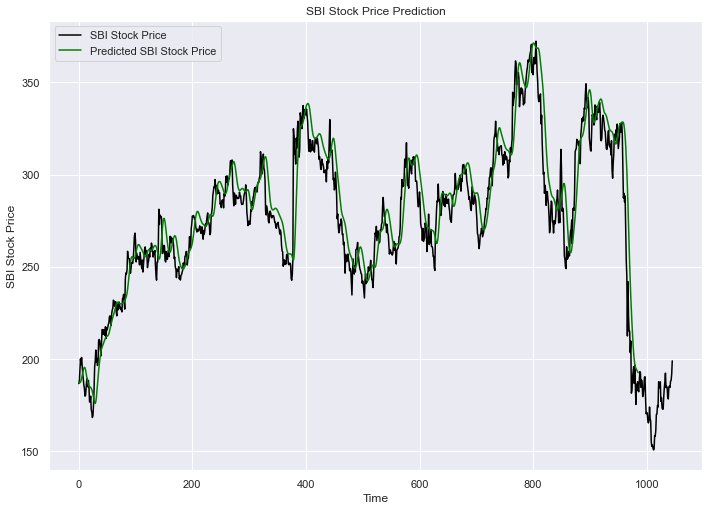

In [100]:

plt.figure()
plt.plot(real_stock_price, color = 'black', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

In [101]:
sbin.index[:4000]

Index([2000-04-03, 2000-04-04, 2000-04-05, 2000-04-06, 2000-04-07, 2000-04-10,
       2000-04-11, 2000-04-12, 2000-04-13, 2000-04-17,
       ...
       2016-04-01, 2016-04-04, 2016-04-05, 2016-04-06, 2016-04-07, 2016-04-08,
       2016-04-11, 2016-04-12, 2016-04-13, 2016-04-18],
      dtype='object', name='Date', length=4000)

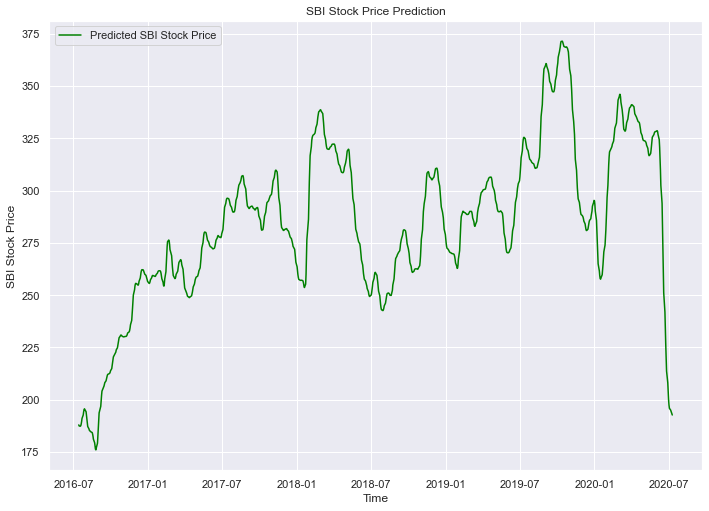

In [102]:
#plt.plot(real_stock_price, color = 'black', label = 'SBI Stock Price')
plt.plot(sbin.index[4060:],predicted_stock_price, color = 'green', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

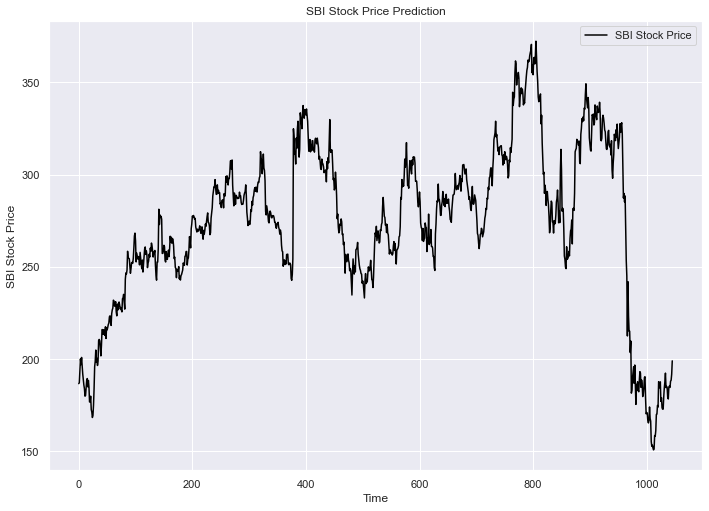

In [103]:
plt.plot(real_stock_price, color = 'black', label = 'SBI Stock Price')
#plt.plot(predicted_stock_price, color = 'green', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

In [104]:
len(real_stock_price)

1046

In [105]:
len(predicted_stock_price)

986

In [106]:
sbin

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover
Date,,,,,,,,,,,
2000-04-03,SBIN,EQ,204.75,205.00,219.65,205.00,211.50,213.30,214.44,3924088,8.414777e+13
2000-04-04,SBIN,EQ,213.30,210.55,211.50,196.25,196.25,196.35,200.50,2934025,5.882657e+13
2000-04-05,SBIN,EQ,196.35,197.00,203.00,187.50,196.50,196.20,194.80,2155066,4.197978e+13
2000-04-06,SBIN,EQ,196.20,198.00,206.40,194.30,203.75,203.90,201.20,3351461,6.743140e+13
2000-04-07,SBIN,EQ,203.90,204.00,219.50,204.00,216.25,218.10,213.65,7451592,1.592001e+14
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,SBIN,EQ,184.70,186.60,189.85,186.15,187.90,188.05,188.35,43789749,8.247963e+14
2020-07-07,SBIN,EQ,188.05,187.00,189.20,184.05,188.00,188.60,186.66,55124984,1.028941e+15
2020-07-08,SBIN,EQ,188.60,188.90,197.45,188.40,191.70,191.90,194.17,143083196,2.778285e+15
